In [3]:
"""
Transfer learning for flower image classification:
-- 3500 flower photos have been used for multi class classification of flowers between 5 groups:
 ("roses", "daisy", "dandelion", "sunflowers", "tulips") each containes about 700 images
--convolutional neural network (CNN) and data agumentaion has been tasted for classification of flowers
-- Transfer Learning with pre-trained model of fishes download from tensorflow.hub used for flower image classification
-- Transfer learning with Inception model used for flower image classification
"""

In [107]:
import numpy as np
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import urllib.request
# pip install opencv-python 
import cv2  
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPool2D
# pip install tensorflow_hub
import tensorflow_hub as hub
from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn.metrics import classification_report

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
dir_flower=keras.utils.get_file(origin=dataset_url,cache_dir='.',untar=True)

228813984/228813984 [==============================] - 10s 0us/step


In [2]:
flowers_dic={
    "roses": glob.glob("datasets/flower_photos/roses/*.jpg"),
    "daisy": glob.glob("datasets/flower_photos/daisy/*.jpg"),
    "dandelion": glob.glob("datasets/flower_photos/dandelion/*.jpg"),
    "sunflowers": glob.glob("datasets/flower_photos/sunflowers/*.jpg"),
    "tulips": glob.glob("datasets/flower_photos/tulips/*.jpg")    
}

In [114]:
for i in flowers_dic.keys():
    print(i,len(flowers_dic[i]))


roses 641
daisy 633
dandelion 898
sunflowers 699
tulips 799


In [39]:
flower_classes={
                "roses": 0,
                "daisy" :1,
                "dandelion":2,
                "sunflowers":3,
                 "tulips":4}

In [40]:
X=[]
Y=[]
for flower_name,images in flowers_dic.items():
    for image in images:
        img=cv2.imread(image)
        X.append(cv2.resize(img,(180,180)))
        Y.append(flower_classes[flower_name])            

In [60]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y, test_size=0.25,random_state=100)

In [63]:
xtrain=np.array(xtrain)/255
xtest=np.array(xtest)/255
ytrain=np.array(ytrain)
ytest=np.array(ytest)

# CNN model with data agumentation

In [70]:
data_agumentation=keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
])

In [71]:
model=keras.Sequential([
    data_agumentation,
    keras.layers.Conv2D(filters=16,kernel_size=(3,3),input_shape=(180,180,3),activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'),
    keras.layers.MaxPool2D(3),
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
    keras.layers.MaxPool2D(3),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(5,activation='softmax')    
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

model.fit(xtrain, ytrain, epochs=30)

Epoch 1/30
86/86 [==============================] - 35s 375ms/step - loss: 1.2482 - accuracy: 0.4691
Epoch 2/30
86/86 [==============================] - 33s 380ms/step - loss: 1.0243 - accuracy: 0.5916
Epoch 3/30
86/86 [==============================] - 33s 381ms/step - loss: 0.9468 - accuracy: 0.6384
Epoch 4/30
86/86 [==============================] - 30s 352ms/step - loss: 0.8602 - accuracy: 0.6686
Epoch 5/30
86/86 [==============================] - 30s 350ms/step - loss: 0.7996 - accuracy: 0.6933
Epoch 6/30
86/86 [==============================] - 31s 366ms/step - loss: 0.7822 - accuracy: 0.7115
Epoch 7/30
86/86 [==============================] - 30s 346ms/step - loss: 0.7458 - accuracy: 0.7253
Epoch 8/30
86/86 [==============================] - 31s 365ms/step - loss: 0.7053 - accuracy: 0.7311
Epoch 9/30
86/86 [==============================] - 32s 369ms/step - loss: 0.6843 - accuracy: 0.7395
Epoch 10/30
86/86 [==============================] - 31s 366ms/step - loss: 0.6413 - accura

In [72]:
model.evaluate(xtest,ytest)

29/29 [==============================] - 2s 70ms/step - loss: 0.7859 - accuracy: 0.7625


[0.7859212756156921, 0.7625272274017334]

In [73]:
ypred_flower=model.predict(xtest)
ypred_class_flower=[np.argmax(i) for i in ypred_flower]

29/29 [==============================] - 2s 64ms/step


<Axes: >

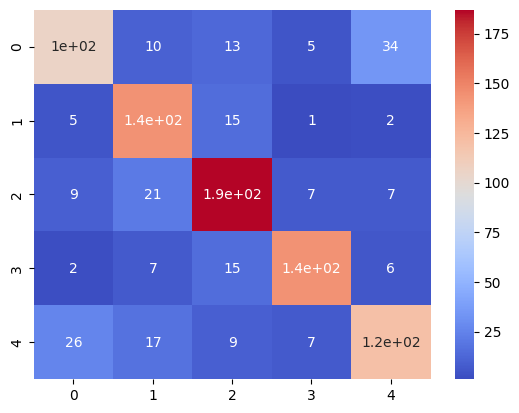

In [77]:
cm=tf.math.confusion_matrix(ytest,ypred_class_flower)
sns.heatmap(cm, annot=True, cmap="coolwarm")

In [80]:
print(classification_report(ytest,ypred_class_flower))

              precision    recall  f1-score   support

           0       0.71      0.63      0.67       167
           1       0.72      0.86      0.79       167
           2       0.78      0.81      0.80       231
           3       0.88      0.83      0.85       174
           4       0.71      0.67      0.69       179

    accuracy                           0.76       918
   macro avg       0.76      0.76      0.76       918
weighted avg       0.76      0.76      0.76       918



# Transfer Learning with pre-trained model of fishes used for flower image classification

In [83]:
X=[]
Y=[]
for flower_name,images in flowers_dic.items():
    for image in images:
        img=cv2.imread(image)
        X.append(cv2.resize(img,(224,224)))
        Y.append(flower_classes[flower_name])  

xtrain,xtest,ytrain,ytest=train_test_split(X,Y, test_size=0.25,random_state=100)    

xtrain=np.array(xtrain)/255
xtest=np.array(xtest)/255
ytrain=np.array(ytrain)
ytest=np.array(ytest)

In [102]:
len(X)

3670

In [84]:
model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",input_shape=(224, 224,3), trainable=False),
    keras.layers.Dense(5,activation='softmax')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_3 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [85]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

model.fit(xtrain, ytrain, epochs=5)

Epoch 1/5
86/86 [==============================] - 49s 522ms/step - loss: 0.8353 - accuracy: 0.6944
Epoch 2/5
86/86 [==============================] - 42s 492ms/step - loss: 0.4184 - accuracy: 0.8579
Epoch 3/5
86/86 [==============================] - 42s 491ms/step - loss: 0.3238 - accuracy: 0.8946
Epoch 4/5
86/86 [==============================] - 43s 497ms/step - loss: 0.2721 - accuracy: 0.9095
Epoch 5/5
86/86 [==============================] - 42s 491ms/step - loss: 0.2288 - accuracy: 0.9310


In [86]:
model.evaluate(xtest,ytest)

29/29 [==============================] - 20s 654ms/step - loss: 0.3874 - accuracy: 0.8584


[0.38735049962997437, 0.85838782787323]

In [87]:
ypred_flower=model.predict(xtest)
ypred_class_flower=[np.argmax(i) for i in ypred_flower]

29/29 [==============================] - 16s 522ms/step


<Axes: >

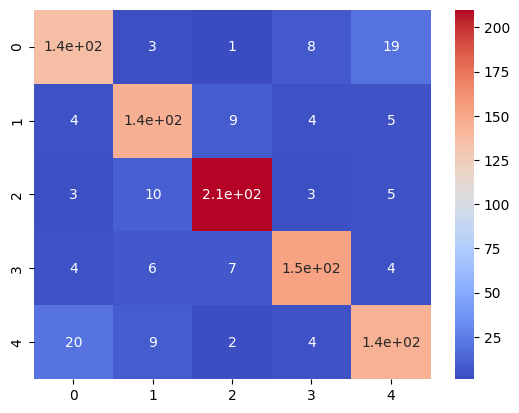

In [88]:
cm=tf.math.confusion_matrix(ytest,ypred_class_flower)
sns.heatmap(cm, annot=True, cmap="coolwarm")

In [89]:
print(classification_report(ytest,ypred_class_flower))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       167
           1       0.84      0.87      0.85       167
           2       0.92      0.91      0.91       231
           3       0.89      0.88      0.88       174
           4       0.81      0.80      0.81       179

    accuracy                           0.86       918
   macro avg       0.85      0.86      0.85       918
weighted avg       0.86      0.86      0.86       918



# Transfer learning with Inception model

In [94]:
X=[]
Y=[]
for flower_name,images in flowers_dic.items():
    for image in images:
        img=cv2.imread(image)
        X.append(cv2.resize(img,(150, 150)))
        Y.append(flower_classes[flower_name])  

xtrain,xtest,ytrain,ytest=train_test_split(X,Y, test_size=0.25,random_state=100)    

xtrain=np.array(xtrain)/255
xtest=np.array(xtest)/255
ytrain=np.array(ytrain)
ytest=np.array(ytest)

In [99]:
weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
weights_file = "inception_v3.h5"
urllib.request.urlretrieve(weights_url, weights_file)

# Instantiate the model
pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                                include_top=False,
                                weights=None)

# load pre-trained weights
pre_trained_model.load_weights(weights_file)

# freeze the layers
for layer in pre_trained_model.layers:
    layer.trainable = False

# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output


# Flatten the output layer to 1 dimension
x = Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = Dense(1024, activation='relu')(x)
# Add a final sigmoid layer for classification
x = Dense(5, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)


last layer output shape:  (None, 7, 7, 768)


In [100]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

model.fit(xtrain, ytrain, epochs=5)

Epoch 1/5
86/86 [==============================] - 72s 796ms/step - loss: 1.4605 - accuracy: 0.7104
Epoch 2/5
86/86 [==============================] - 66s 761ms/step - loss: 0.1397 - accuracy: 0.9582
Epoch 3/5
86/86 [==============================] - 75s 869ms/step - loss: 0.0364 - accuracy: 0.9945
Epoch 4/5
86/86 [==============================] - 68s 790ms/step - loss: 0.0122 - accuracy: 0.9993
Epoch 5/5
86/86 [==============================] - 69s 800ms/step - loss: 0.0077 - accuracy: 0.9993


In [106]:
model.evaluate(xtest,ytest)

29/29 [==============================] - 10s 300ms/step - loss: 0.5838 - accuracy: 0.8301


[0.5837910771369934, 0.8300653696060181]

In [103]:
ypred_flower=model.predict(xtest)
ypred_class_flower=[np.argmax(i) for i in ypred_flower]

29/29 [==============================] - 12s 366ms/step


<Axes: >

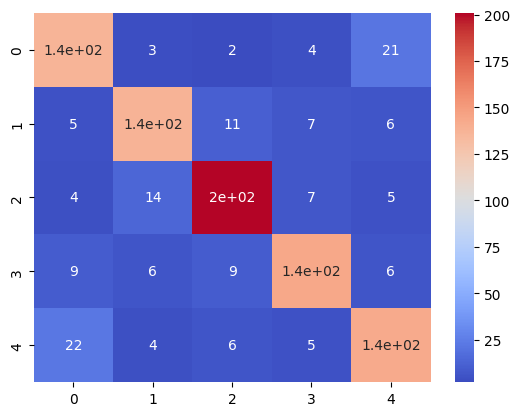

In [104]:
cm=tf.math.confusion_matrix(ytest,ypred_class_flower)
sns.heatmap(cm, annot=True, cmap="coolwarm")

In [105]:
print(classification_report(ytest,ypred_class_flower))

              precision    recall  f1-score   support

           0       0.77      0.82      0.80       167
           1       0.84      0.83      0.83       167
           2       0.88      0.87      0.87       231
           3       0.86      0.83      0.84       174
           4       0.79      0.79      0.79       179

    accuracy                           0.83       918
   macro avg       0.83      0.83      0.83       918
weighted avg       0.83      0.83      0.83       918



2


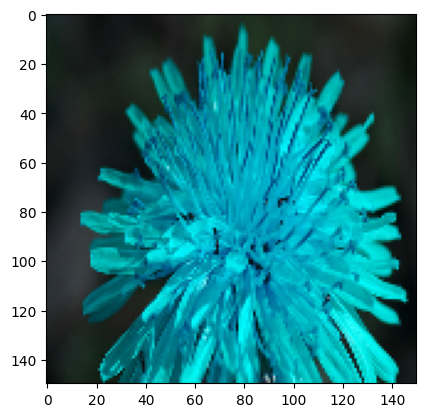

In [116]:
plt.imshow(xtest[10])
print(ypred_class_flower[10])

In [ ]:
# Another way for data preprocessing, agumentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory("Path/to/train",
                                                    batch_size=100,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory("Path/to/test",
                                                              batch_size=100,
                                                              class_mode='categorical',
                                                              target_size=(150, 150))